In [0]:
import pandas as pd
import re
import collections as col
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [0]:
from wordcloud import WordCloud

In [0]:
data = open('cblData.txt', 'r').read()

In [9]:
corpus = data.lower().split("\n")
len(corpus)

907

In [0]:
vocab = []
for line in corpus:
    if '*' not in line:
        addLine = line.lstrip()
        addLine = re.sub(' +', ' ', addLine)
        vocab.append(addLine)

In [0]:
uniqueWords = []
for line in vocab:
    words = line.split(' ')
    for word in words:
        if word not in uniqueWords:
            uniqueWords.append(word)

In [12]:
len(uniqueWords)

506

In [13]:
len(vocab)

826

In [0]:
cblDict = dict((k1,0) for k1 in uniqueWords)

In [0]:
cblData=[]
for line in vocab:
    data = [0]*len(uniqueWords)
    words = line.split(' ')
    for word in words:
        data[list(cblDict.keys()).index(word)] = 1
    cblData.append(data)

In [16]:
cblDataset = pd.DataFrame(data=cblData, columns=uniqueWords)
cblDataset

,identification,division.,program-id.,custmnt2.,environment,data,working-storage,section.,01,switches.,...,9999v9(20),b,b:,c:,a<(b+c),b<(a+c),c<(a+b),"""good","triangle.""","""not"
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
sumCol = cblDataset.sum(axis=0)
sumCol

identification         10
division.              40
program-id.            10
custmnt2.               1
environment            10
data                   10
working-storage         1
section.               15
01                     33
switches.               1
05                     27
valid-data-sw          12
pic                    44
x(01)                   1
value                  34
'y'.                    2
88                      9
valid-data              6
flags.                  1
send-flag               1
x(01).                  2
send-erase             11
'1'.                    2
send-erase-alarm        7
'2'.                    2
send-dataonly           1
'3'.                    2
send-dataonly-alarm     8
'4'.                    2
work-fields.            1
                       ..
array_element(2).       8
128                     3
array_element(3).       7
11                      3
array_element(1)        3
(1:2).                  3
table01.                4
times.      

In [0]:
corrData = cblDataset.filter(['identification', 'division.', 'program-id.', 'environment', 'data', 'section.', 'valid-data-sw', 'pic'], axis=1)

In [19]:
cblDataset.corr()

,identification,division.,program-id.,custmnt2.,environment,data,working-storage,section.,01,switches.,...,9999v9(20),b,b:,c:,a<(b+c),b<(a+c),c<(a+b),"""good","triangle.""","""not"
identification,1.000000,0.490723,-0.012255,-0.003854,-0.012255,-0.012255,-0.003854,-0.015055,-0.022583,-0.003854,...,-0.006684,-0.005454,-0.003854,-0.003854,-0.003854,-0.003854,-0.003854,-0.003854,-0.005454,-0.003854
division.,0.490723,1.000000,-0.024973,-0.007854,0.490723,0.490723,-0.007854,-0.030680,-0.046019,-0.007854,...,-0.013620,-0.011114,-0.007854,-0.007854,-0.007854,-0.007854,-0.007854,-0.007854,-0.011114,-0.007854
program-id.,-0.012255,-0.024973,1.000000,0.314498,-0.012255,-0.012255,-0.003854,-0.015055,-0.022583,-0.003854,...,-0.006684,-0.005454,-0.003854,-0.003854,-0.003854,-0.003854,-0.003854,-0.003854,-0.005454,-0.003854
custmnt2.,-0.003854,-0.007854,0.314498,1.000000,-0.003854,-0.003854,-0.001212,-0.004735,-0.007102,-0.001212,...,-0.002102,-0.001715,-0.001212,-0.001212,-0.001212,-0.001212,-0.001212,-0.001212,-0.001715,-0.001212
environment,-0.012255,0.490723,-0.012255,-0.003854,1.000000,-0.012255,-0.003854,-0.015055,-0.022583,-0.003854,...,-0.006684,-0.005454,-0.003854,-0.003854,-0.003854,-0.003854,-0.003854,-0.003854,-0.005454,-0.003854
data,-0.012255,0.490723,-0.012255,-0.003854,-0.012255,1.000000,-0.003854,-0.015055,-0.022583,-0.003854,...,-0.006684,-0.005454,-0.003854,-0.003854,-0.003854,-0.003854,-0.003854,-0.003854,-0.005454,-0.003854
working-storage,-0.003854,-0.007854,-0.003854,-0.001212,-0.003854,-0.003854,1.000000,0.255999,-0.007102,-0.001212,...,-0.002102,-0.001715,-0.001212,-0.001212,-0.001212,-0.001212,-0.001212,-0.001212,-0.001715,-0.001212
section.,-0.015055,-0.030680,-0.015055,-0.004735,-0.015055,-0.015055,0.255999,1.000000,-0.027743,-0.004735,...,-0.008211,-0.006700,-0.004735,-0.004735,-0.004735,-0.004735,-0.004735,-0.004735,-0.006700,-0.004735
01,-0.022583,-0.046019,-0.022583,-0.007102,-0.022583,-0.022583,-0.007102,-0.027743,1.000000,0.170668,...,0.295965,0.115729,-0.007102,-0.007102,-0.007102,-0.007102,-0.007102,-0.007102,-0.010050,-0.007102
switches.,-0.003854,-0.007854,-0.003854,-0.001212,-0.003854,-0.003854,-0.001212,-0.004735,0.170668,1.000000,...,-0.002102,-0.001715,-0.001212,-0.001212,-0.001212,-0.001212,-0.001212,-0.001212,-0.001715,-0.001212


In [20]:
corrMatrix = corrData.corr()
corrMatrix

,identification,division.,program-id.,environment,data,section.,valid-data-sw,pic
identification,1.000000,0.490723,-0.012255,-0.012255,-0.012255,-0.015055,-0.013441,-0.026259
division.,0.490723,1.000000,-0.024973,0.490723,0.490723,-0.030680,-0.027390,-0.053511
program-id.,-0.012255,-0.024973,1.000000,-0.012255,-0.012255,-0.015055,-0.013441,-0.026259
environment,-0.012255,0.490723,-0.012255,1.000000,-0.012255,-0.015055,-0.013441,-0.026259
data,-0.012255,0.490723,-0.012255,-0.012255,1.000000,-0.015055,-0.013441,-0.026259
section.,-0.015055,-0.030680,-0.015055,-0.015055,-0.015055,1.000000,-0.016513,-0.032260
valid-data-sw,-0.013441,-0.027390,-0.013441,-0.013441,-0.013441,-0.016513,1.000000,0.016255
pic,-0.026259,-0.053511,-0.026259,-0.026259,-0.026259,-0.032260,0.016255,1.000000


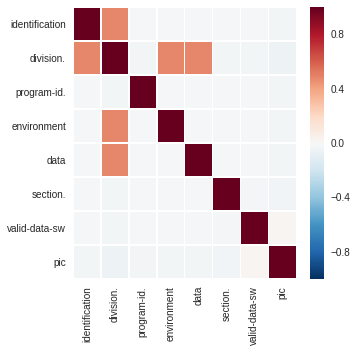

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corrMatrix,linewidths=.5, ax=ax)


In [23]:
content = open('cblData.txt', 'r').read()
content

'       IDENTIFICATION DIVISION.\n      *\n       PROGRAM-ID.  CUSTMNT2.\n      *\n       ENVIRONMENT DIVISION.\n      *\n       DATA DIVISION.\n      *\n       WORKING-STORAGE SECTION.\n      *\n       01  SWITCHES.\n      *\n           05  VALID-DATA-SW                 PIC X(01) VALUE \'Y\'.\n               88  VALID-DATA                          VALUE \'Y\'.\n      *\n       01  FLAGS.\n      *\n           05  SEND-FLAG                     PIC X(01).\n               88  SEND-ERASE                       VALUE \'1\'.\n               88  SEND-ERASE-ALARM                 VALUE \'2\'.\n               88  SEND-DATAONLY                    VALUE \'3\'.\n               88  SEND-DATAONLY-ALARM              VALUE \'4\'.\n      *\n       01  WORK-FIELDS.\n      *\n           05  RESPONSE-CODE                 PIC S9(08) COMP.\n      *\n       01  USER-INSTRUCTIONS.\n      *\n           05  ADD-INSTRUCTION               PIC X(79) VALUE\n               \'Type information for new customer.  Then Pr

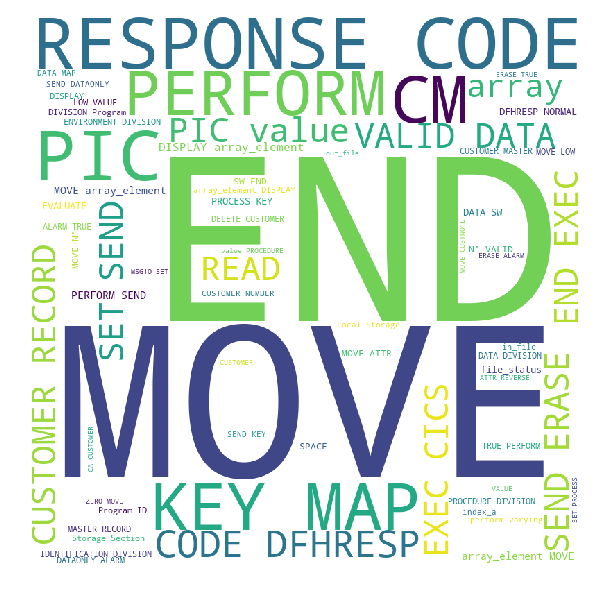

In [24]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(content) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
Y = []
X = []
for word in uniqueWords:
  value = [0]*len(uniqueWords)
  index = uniqueWords.index(word)
  for i in range (len(cblDataset)):
    if cblDataset[word][i] == 1:
      Y.append(cblDataset.iloc[i,:]/506)
      value[index] = 1
      X.append(value)

In [125]:
X_train = np.array([np.array(Xi) for Xi in X])
Y_train = np.array([np.array(Yi) for Yi in Y])
X_train.shape, Y_train.shape

((2389, 506), (2389, 506))

In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)  

In [0]:
vocab_size = len(uniqueWords)
ip = tf.placeholder(tf.float32, shape=(None, vocab_size))
op = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [0]:
EMBEDDING_DIM = 4500
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) 
hidden_representation = tf.add(tf.matmul(ip,W1), b1)

In [0]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [113]:
X_train[100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00197628, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [132]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(op * tf.log(prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10
for _ in range(n_iters):
    print('W1:', sess.run(W1))
    print('----------------------------------------------')
    print('b1:', sess.run(b1))
    print('----------------------------------------------')
    print('hidden_representation :', X_train[0].reshape(506,1)*sess.run(W1) + sess.run(b1))
    print('----------------------------------------------')
    print('output :', (X_train[0].reshape(506,1)*sess.run(W1) + sess.run(b1)).reshape(4500,506) *sess.run(W2) + sess.run(b2))
    print('----------------------------------------------')
    print('log output :', np.log((X_train[0].reshape(506,1)*sess.run(W1) + sess.run(b1)).reshape(4500,506) *sess.run(W2) + sess.run(b2)))
    print('----------------------------------------------')
    sess.run(train_step, feed_dict={ip: X_train, op: Y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={ip: X_train, op: Y_train}))

W1: [[-1.0275329   0.41409025 -0.5105483  ...  0.13219975 -0.9888193
   1.5565002 ]
 [-0.52364236 -0.9874141   0.48089805 ... -1.8184164   0.69918305
   0.6469349 ]
 [ 0.8394616  -0.35214156  0.53338754 ... -0.94545734  1.0714442
  -1.0417066 ]
 ...
 [-0.17469859 -0.54957086 -0.23629433 ...  0.94373643 -0.16979544
   1.1556399 ]
 [ 1.305128    1.2678685   0.831723   ... -1.074283    1.2240698
   0.27978227]
 [-0.4225155  -0.16438457  0.16740748 ...  0.25491568  0.8953144
  -1.184339  ]]
----------------------------------------------
b1: [-0.77633005 -1.4133146   0.21335398 ...  0.36106524 -1.559002
 -0.41923794]
----------------------------------------------
hidden_representation : [[-1.80386299 -0.99922433 -0.29719432 ...  0.49326499 -2.54782134
   1.13726225]
 [-0.77633005 -1.41331458  0.21335398 ...  0.36106524 -1.55900204
  -0.41923794]
 [-0.77633005 -1.41331458  0.21335398 ...  0.36106524 -1.55900204
  -0.41923794]
 ...
 [-0.77633005 -1.41331458  0.21335398 ...  0.36106524 -1.5590

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


log output : [[-7.13543300e-01 -2.53700857e+00             nan ... -1.44410354e+00
   1.57863758e+00 -1.84356829e-01]
 [-5.07880197e-01 -1.57787433e-01             nan ...             nan
              nan -1.36141240e+00]
 [-1.68798977e+00 -7.30707231e-01             nan ...  2.62545906e-03
              nan  4.66759118e-01]
 ...
 [-3.64812485e+00             nan             nan ...  2.72254750e-01
  -1.96326517e-02             nan]
 [            nan -2.69420201e-01             nan ...  3.36819199e-01
              nan -1.12455356e+00]
 [            nan             nan             nan ... -7.45217941e-01
  -1.23217017e+00             nan]]
----------------------------------------------
loss is :  nan
W1: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
----------------------------------------------
b1: [nan nan nan ... nan nan nan]
------------

In [92]:
X_train[0].reshape(506,1)*sess.run(W1)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])